<a href="https://colab.research.google.com/github/tillaczel/Machine-learning-workshop/blob/master/MNIST_fashion_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion exercise
This is a tutorial for the basics of neural network hyperparameters. The task is to achieve high accuracy on the MNIST fashion dataset.

## Reference
This tutorial was built upon the official tensorflow fashion tutorial (https://www.tensorflow.org/tutorials/keras/classification).

## Installing and imoprting libraries
Upgrading to tensorflow 2.0.

In [1]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


Importing keras, numpy, and pyplot.

In [0]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

## Data preparation
Importing MNIST from keras.

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Printing out data shape and visualizing the first train input.

Train x shape: (60000, 28, 28)
Train y shape: (60000,)
Test x shape: (10000, 28, 28)
Test y shape: (10000,)


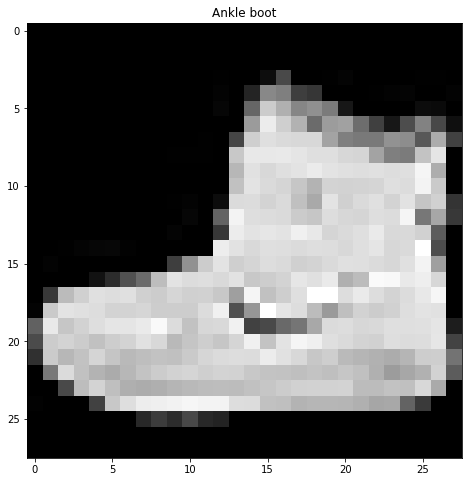

In [4]:
print(f'Train x shape: {x_train.shape}')
print(f'Train y shape: {y_train.shape}')
print(f'Test x shape: {x_test.shape}')
print(f'Test y shape: {y_test.shape}')

fig = plt.figure(figsize=(8,8))
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])
plt.show()

Normalising data.

In [5]:
print(f'Min train x: {np.min(x_train)}')
print(f'Max train x: {np.max(x_train)}')

x_train_norm, x_test_norm,= x_train/255, x_test/255
print(f'Min normalised train x: {np.min(x_train_norm)}')
print(f'Max normalised train x: {np.max(x_train_norm)}')

Min train x: 0
Max train x: 255
Min normalised train x: 0.0
Max normalised train x: 1.0


## Building and training the neural network
This is the implementation from the MNIST digits tutorial we did on the first week (https://github.com/tillaczel/Machine-learning-workshop/blob/master/Feed_forward_MNIST.ipynb). Your task is to build a model, which achieves the highest accuracy.

In [0]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compiling model. The optimizer is the stochastic gradient descent, the loss function the sparse categorical crossentropy. Accuracy is added as a metric.

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model is fitted for 10 epochs.

In [8]:
history = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.7404 - accuracy: 0.7599 - val_loss: 0.5818 - val_accuracy: 0.8009
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5153 - accuracy: 0.8242 - val_loss: 0.5114 - val_accuracy: 0.8239
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4702 - accuracy: 0.8386 - val_loss: 0.4855 - val_accuracy: 0.8305
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4447 - accuracy: 0.8454 - val_loss: 0.4610 - val_accuracy: 0.8367
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4271 - accuracy: 0.8524 - val_loss: 0.4535 - val_accuracy: 0.8377
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4134 - accuracy: 0.8575 - val_loss: 0.4509 - val_accuracy: 0.8385
Epoch 7/10
60000/60000 [=============================

## Visualizing results
First lets visualize the train and validation loss function. If the slope of the loss function is big, the model needs to be trained for more epochs. If the validation loss is much higher than the train loss, then the model overfit the dataset.

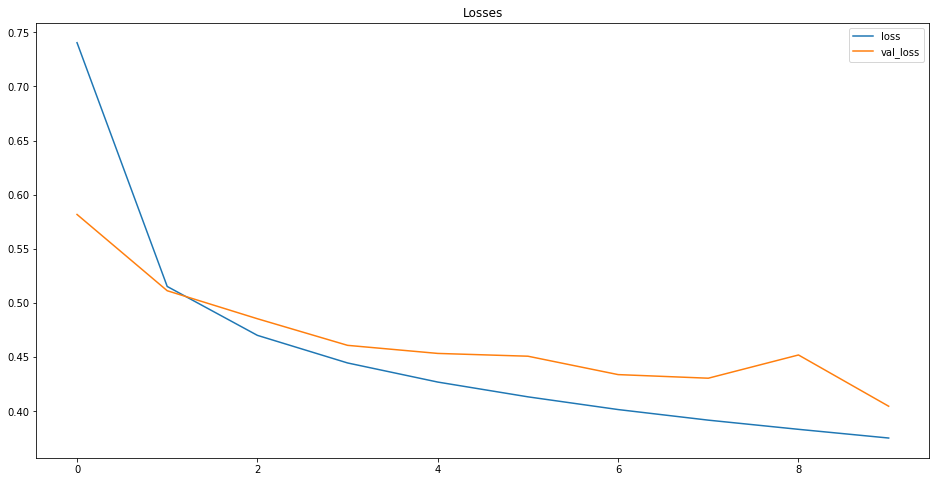

In [9]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Losses')
plt.show()

The accuracy showes the percentage of correctly labeld pictures.

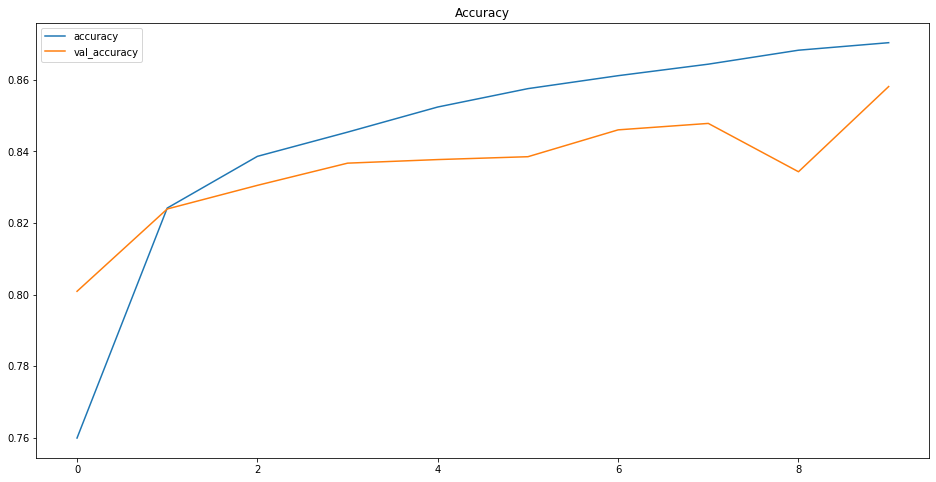

In [10]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

Lets plot the first 100 samples of the validation set, with their predictions.

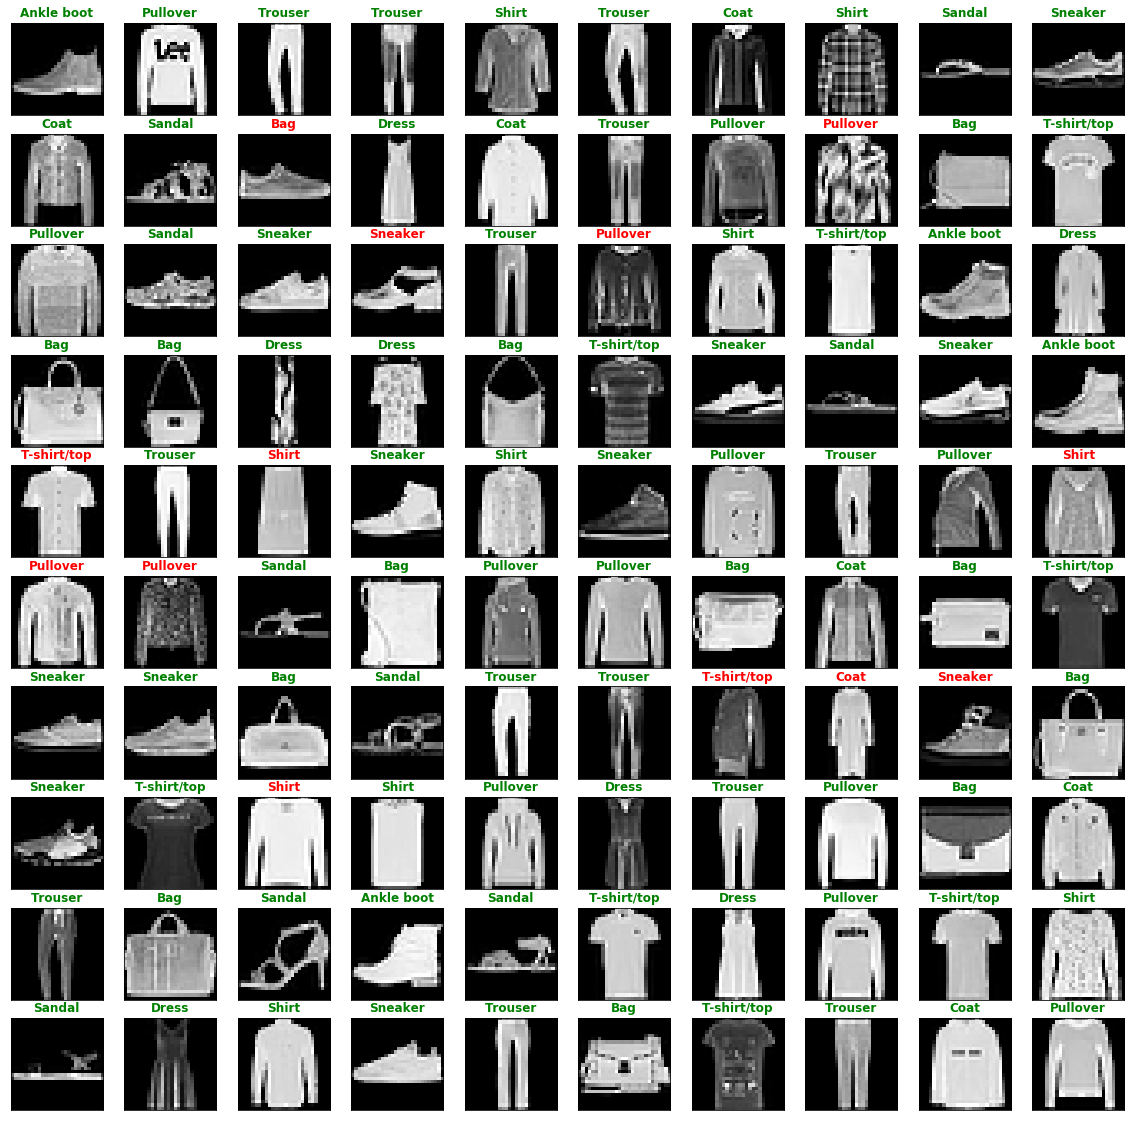

In [11]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_norm[i], cmap='gray')
    prediction = np.argmax(model.predict(x_test_norm[i, np.newaxis]))
    title_obj = plt.title(class_names[prediction], fontweight="bold")
    if prediction == y_test[i]:
      plt.setp(title_obj, color='g')
    else:
      plt.setp(title_obj, color='r')
plt.show()